# converting the proteinGroups.output txt 

In [59]:
import csv
import glob

# Replace '*.txt' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/*.txt'):
    # Generate output file name by replacing '.txt' with '.csv'
    output_file_path = file_path.replace('.txt', '.csv')

    with open(file_path, 'r') as input_file, open(output_file_path, 'w', newline='') as output_file:
        # Create a CSV writer object
        writer = csv.writer(output_file)
        
        # Iterate over each line in the input file
        for line in input_file:
            # Split the line into fields using the tab delimiter
            fields = line.strip().split('\t')

            # Write the fields to the CSV file
            writer.writerow(fields)

In [ ]:
#Evaluating the proteinGroups.txt output for classic_grouping_no_remap. 

In [62]:
import pandas as pd
import glob
import os

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/*.csv'):
    # Generate output file name by prefixing 'Separate' to the input file name
    output_file_path = 'SeparateProteinIDs_' + file_path  

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

    # Write the new DataFrame to a separate CSV file
    new_df.to_csv(output_file_path, index=False)


In [4]:
df= pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/SeparateIDs_proteinGroups_methods_files/proteinGroups_savitski_no_remap_32.csv')
print(df)

       Q-value Protein Type  Protein Uniprot Protein Label
0     0.000179           sp           P42566   EPS15_HUMAN
1     0.000179           sp           Q5JSL3   DOC11_HUMAN
2     0.000179           sp           Q1KMD3   HNRL2_HUMAN
3     0.000179           sp           Q16204   CCDC6_HUMAN
4     0.000179           sp           P09001    RM03_HUMAN
...        ...          ...              ...           ...
9466  0.214909           sp         Q86UW9-2    DTX2_HUMAN
9467  0.215037      REV__pI  c12riboseqorf96           NaN
9468  0.215110      REV__sp           Q9UIJ5   ZDHC2_HUMAN
9469  0.215110           sp           Q5TCS8    KAD9_HUMAN
9470  0.215110           sp           P06858    LIPL_HUMAN

[9471 rows x 4 columns]


sp         7569
REV__sp    1450
REV__sR     110
pI          107
sR          103
REV__pI     101
sU           10
REV__sU       8
REV__nC       7
nC            6
Name: Protein Type, dtype: int64


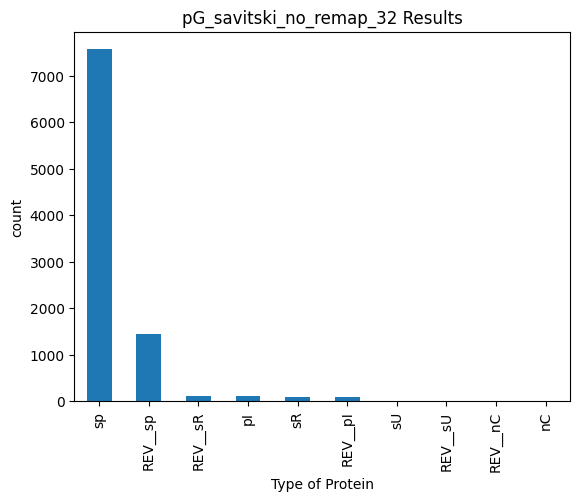

In [7]:
import matplotlib.pyplot as plt
import numpy as np 

# Load the CSV file into a pandas DataFrame
df= pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/SeparateIDs_proteinGroups_methods_files/proteinGroups_savitski_no_remap_32.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_savitski_no_remap_32 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

In [ ]:
# Filter all files for 1 % FDR

In [48]:
import pandas as pd
import glob
import os

# Create the output directory if it does not exist
output_dir = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter'
os.makedirs(output_dir, exist_ok=True)

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/*.csv'):
    # Generate output file name with the prefix '0.01_Filter_' and suffix '.csv'
    output_file_name = '0.01_Filter_' + os.path.basename(file_path)
    output_file_path = os.path.join(output_dir, output_file_name)

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Filter for Q-value < 0.01
    df = df[df['Q-value'] < 0.01]

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Write the new DataFrame to a separate CSV file in the output directory
    new_df.to_csv(output_file_path, index=False)


In [11]:
df= pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/0.01_Filter_proteinGroups_savitski_no_remap_32.csv')
print(df)


       Q-value Protein Type Protein Uniprot Protein Label
0     0.000179           sp          P42566   EPS15_HUMAN
1     0.000179           sp          Q5JSL3   DOC11_HUMAN
2     0.000179           sp          Q1KMD3   HNRL2_HUMAN
3     0.000179           sp          Q16204   CCDC6_HUMAN
4     0.000179           sp          P09001    RM03_HUMAN
...        ...          ...             ...           ...
6091  0.009609           sp          Q92989    CLP1_HUMAN
6092  0.009775      REV__sp          Q8NGR6   OR1B1_HUMAN
6093  0.009937      REV__pI   c8riboseqorf7           NaN
6094  0.009937           sp          Q9UIU6    SIX4_HUMAN
6095  0.009937           sp        Q14558-2    KPRA_HUMAN

[6096 rows x 4 columns]


In [ ]:
#Displaying number of target proteins in each method and raw file. 

In [12]:
import pandas as pd
import glob
import os

# Create the output directory if it does not exist
output_dir = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter'
os.makedirs(output_dir, exist_ok=True)

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/*.csv'):
    # Generate output file name with the prefix '0.01_Filter_' and suffix '.csv'
    output_file_name = '0.01_Filter_' + os.path.basename(file_path)
    output_file_path = os.path.join(output_dir, output_file_name)

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Filter for Q-value < 0.01
    df = df[df['Q-value'] < 0.01]

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Count the number of target proteins (without 'REV__' in Protein Label)
    num_targets = len(new_df[new_df['Protein Label'].str.startswith('REV__', na=False)==False])

    # Print the filename and number of target proteins
    print(f"{output_file_name}: {num_targets} target proteins")


0.01_Filter_proteinGroups_picked_protein_group_no_remap_128.csv: 11462 target proteins
0.01_Filter_proteinGroups_classic_grouping_no_remap_16.csv: 8120 target proteins
0.01_Filter_proteinGroups_classic_rescue_grouping_no_remap_8192.csv: 15938 target proteins
0.01_Filter_proteinGroups_picked_protein_group_no_remap_64.csv: 10871 target proteins
0.01_Filter_proteinGroups_classic_no_grouping_no_remap_512.csv: 9378 target proteins
0.01_Filter_proteinGroups_classic_no_grouping_no_remap_128.csv: 7638 target proteins
0.01_Filter_proteinGroups_picked_protein_group_no_remap_512.csv: 13366 target proteins
0.01_Filter_proteinGroups_classic_rescue_grouping_no_remap_16384.csv: 15887 target proteins
0.01_Filter_proteinGroups_picked_protein_group_no_remap_4.csv: 7532 target proteins
0.01_Filter_proteinGroups_classic_rescue_grouping_no_remap_32.csv: 9465 target proteins
0.01_Filter_proteinGroups_classic_grouping_no_remap_2048.csv: 13841 target proteins
0.01_Filter_proteinGroups_classic_grouping_no_rema

In [17]:
import pandas as pd
import glob
import os

# Create the output directory if it does not exist
output_dir = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter'
os.makedirs(output_dir, exist_ok=True)

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/*.csv'):
    # Extract the method and number of raw files from the file name
    file_name = os.path.basename(file_path)
    method = file_name.split('proteinGroups_')[1].split('_16')[0]
    num_raw_files = file_name.split('_')[-1].split('.')[0]

    # Generate output file name with the prefix '0.01_Filter_' and suffix '.csv'
    output_file_name = '0.01_Filter_' + file_name
    output_file_path = os.path.join(output_dir, output_file_name)

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Filter for Q-value < 0.01
    df = df[df['Q-value'] < 0.01]

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Count the number of target proteins (without 'REV__' in Protein Label)
    num_targets = len(new_df[new_df['Protein Label'].str.startswith('REV__', na=False)==False])

    # Add the method, number of raw files, and number of target proteins as new columns to the DataFrame
    new_df['Method'] = method
    new_df['Num Raw Files'] = num_raw_files
    new_df['Num Target Proteins'] = num_targets

    # Write the new DataFrame to a separate CSV file
    new_df.to_csv(output_file_path, index=False)

    # Print the file name, method, number of raw files, and number of target proteins
    print(f"{output_file_name}: Method={method}, Num Raw Files={num_raw_files}, Num Target Proteins={num_targets}")


0.01_Filter_proteinGroups_picked_protein_group_no_remap_128.csv: Method=picked_protein_group_no_remap_128.csv, Num Raw Files=128, Num Target Proteins=11462
0.01_Filter_proteinGroups_classic_grouping_no_remap_16.csv: Method=classic_grouping_no_remap, Num Raw Files=16, Num Target Proteins=8120
0.01_Filter_proteinGroups_classic_rescue_grouping_no_remap_8192.csv: Method=classic_rescue_grouping_no_remap_8192.csv, Num Raw Files=8192, Num Target Proteins=15938
0.01_Filter_proteinGroups_picked_protein_group_no_remap_64.csv: Method=picked_protein_group_no_remap_64.csv, Num Raw Files=64, Num Target Proteins=10871
0.01_Filter_proteinGroups_classic_no_grouping_no_remap_512.csv: Method=classic_no_grouping_no_remap_512.csv, Num Raw Files=512, Num Target Proteins=9378
0.01_Filter_proteinGroups_classic_no_grouping_no_remap_128.csv: Method=classic_no_grouping_no_remap_128.csv, Num Raw Files=128, Num Target Proteins=7638
0.01_Filter_proteinGroups_picked_protein_group_no_remap_512.csv: Method=picked_prot

0.01_Filter_proteinGroups_savitski_no_remap_8.csv: Method=savitski_no_remap_8.csv, Num Raw Files=8, Num Target Proteins=4740
0.01_Filter_proteinGroups_savitski_no_remap_512.csv: Method=savitski_no_remap_512.csv, Num Raw Files=512, Num Target Proteins=9535
0.01_Filter_proteinGroups_classic_grouping_no_remap_4096.csv: Method=classic_grouping_no_remap_4096.csv, Num Raw Files=4096, Num Target Proteins=13964
0.01_Filter_proteinGroups_classic_no_grouping_no_remap_4.csv: Method=classic_no_grouping_no_remap_4.csv, Num Raw Files=4, Num Target Proteins=4431
0.01_Filter_proteinGroups_classic_no_grouping_no_remap_32.csv: Method=classic_no_grouping_no_remap_32.csv, Num Raw Files=32, Num Target Proteins=6047
0.01_Filter_proteinGroups_classic_grouping_no_remap_22796.csv: Method=classic_grouping_no_remap_22796.csv, Num Raw Files=22796, Num Target Proteins=13651
0.01_Filter_proteinGroups_savitski_no_remap_22796.csv: Method=savitski_no_remap_22796.csv, Num Raw Files=22796, Num Target Proteins=12562
0.01

In [23]:
import pandas as pd
import glob
import os

# Create an empty list to store the data
data = []

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/*.csv'):
    # Extract the method and number of raw files from the file name
    file_name = os.path.basename(file_path)
    method = file_name.split('proteinGroups_')[1].split('.csv')[0]
    num_raw_files = method.split('_')[-1]
    method = method.split('_' + num_raw_files)[0]

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Filter for Q-value < 0.01
    df = df[df['Q-value'] < 0.01]

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Count the number of target proteins (without 'REV__' in Protein Label)
    num_targets = len(new_df[new_df['Protein Label'].str.startswith('REV__', na=False)==False])

    # Add the data to the list
    data.append([file_name, method, num_raw_files, num_targets])

# Create a DataFrame from the list of data
df = pd.DataFrame(data, columns=['File Name', 'Method', 'Num Raw Files', 'Num Target Proteins'])

# Write the DataFrame to a CSV file
df.to_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/filtered_data.csv', index=False)


In [24]:
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/filtered_data.csv')
print(df)

                                            File Name  \
0   proteinGroups_picked_protein_group_no_remap_12...   
1      proteinGroups_classic_grouping_no_remap_16.csv   
2   proteinGroups_classic_rescue_grouping_no_remap...   
3   proteinGroups_picked_protein_group_no_remap_64...   
4   proteinGroups_classic_no_grouping_no_remap_512...   
..                                                ...   
75             proteinGroups_savitski_no_remap_64.csv   
76  proteinGroups_classic_rescue_grouping_no_remap...   
77   proteinGroups_classic_no_grouping_no_remap_1.csv   
78     proteinGroups_classic_grouping_no_remap_32.csv   
79  proteinGroups_classic_rescue_grouping_no_remap...   

                              Method  Num Raw Files  Num Target Proteins  
0      picked_protein_group_no_remap            128                11462  
1          classic_grouping_no_remap             16                 8120  
2   classic_rescue_grouping_no_remap           8192                15938  
3      picked_p

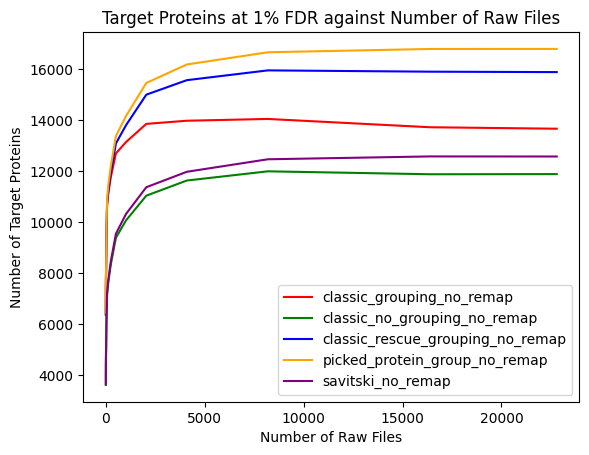

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the filtered data CSV file
df = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/filtered_data.csv')

# Group the data by method
grouped = df.groupby('Method')

# Set up the plot
fig, ax = plt.subplots()

# Set up colors for each method
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Loop through each group and plot the data
for i, (method, group) in enumerate(grouped):
    # Sort the group by the number of raw files
    group = group.sort_values('Num Raw Files')
    # Plot the data as a line
    ax.plot(group['Num Raw Files'], group['Num Target Proteins'], color=colors[i], label=method)

# Set up the legend and axis labels
ax.legend()
ax.set_xlabel('Number of Raw Files')
ax.set_ylabel('Number of Target Proteins')
ax.set_title('Target Proteins at 1% FDR against Number of Raw Files')

# Show the plot
plt.show()



In [ ]:
#Investigating the different types of microproteins

In [45]:
import pandas as pd
import glob

# Define a list of protein types to count
protein_types = ['sp', 'nC', 'pI', 'sU','sR']

# Create an empty dictionary to store the counts for each protein type
counts_dict = {protein_type: [] for protein_type in protein_types}
file_names = []

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/*.csv'):

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Filter for Q-value < 0.01 and only keep target proteins
    df = df[(df['Q-value'] < 0.01) & (~df['Protein Type'].str.startswith('REV__', na=False))]

    # Count the number of proteins for each protein type
    file_name = os.path.basename(file_path)
    file_names.append(file_name)
    for protein_type in protein_types:
        count = len(df[df['Protein Type'].str.startswith(protein_type, na=False)])
        counts_dict[protein_type].append(count)

# Create a DataFrame from the dictionary of counts
df_counts = pd.DataFrame(counts_dict)

# Add a column for file names
df_counts.insert(0, 'File Name', file_names)


# Write the DataFrame to a CSV file
df_counts.to_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/counts.csv', index=False)

In [46]:
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/counts.csv')
print(df)

                                            File Name     sp  nC  pI  sU  sR
0   0.01_Filter_proteinGroups_savitski_no_remap_25...   8371   0   5   0  10
1   0.01_Filter_proteinGroups_classic_no_grouping_...   7050   0   4   0   5
2   0.01_Filter_proteinGroups_classic_grouping_no_...   8036   0   1   0   4
3   0.01_Filter_proteinGroups_classic_grouping_no_...   7722   0   1   0   1
4   0.01_Filter_proteinGroups_classic_rescue_group...   7733   0   1   0   1
..                                                ...    ...  ..  ..  ..  ..
75  0.01_Filter_proteinGroups_classic_grouping_no_...   7353   0   1   0   2
76  0.01_Filter_proteinGroups_savitski_no_remap_20...  11215   1  15   0  16
77  0.01_Filter_proteinGroups_picked_protein_group...  11333   0  10   0   7
78  0.01_Filter_proteinGroups_classic_rescue_group...   7360   0   1   0   2
79  0.01_Filter_proteinGroups_savitski_no_remap_8.csv   4692   0   1   0   2

[80 rows x 6 columns]


In [58]:
import pandas as pd
import re

df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/counts.csv')

# extract the method and number of raw files from the file name using regular expressions
method_regex = r'(?<=Filter_proteinGroups_).*(?=_)'
raw_files_regex = r'(?<=_)\d+(?=.csv$)'
df['Method'] = df['File Name'].apply(lambda x: re.search(method_regex, x).group() if re.search(method_regex, x) else None)
df['Number of Raw Files'] = df['File Name'].apply(lambda x: int(re.search(raw_files_regex, x).group()) if re.search(raw_files_regex, x) else None)

# display the updated DataFrame
print(df)
df.to_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/0.01_Filter/Modified_for_Plots_Microproteins.csv', index= False)

                                            File Name     sp  nC  pI  sU  sR  \
0   0.01_Filter_proteinGroups_savitski_no_remap_25...   8371   0   5   0  10   
1   0.01_Filter_proteinGroups_classic_no_grouping_...   7050   0   4   0   5   
2   0.01_Filter_proteinGroups_classic_grouping_no_...   8036   0   1   0   4   
3   0.01_Filter_proteinGroups_classic_grouping_no_...   7722   0   1   0   1   
4   0.01_Filter_proteinGroups_classic_rescue_group...   7733   0   1   0   1   
..                                                ...    ...  ..  ..  ..  ..   
75  0.01_Filter_proteinGroups_classic_grouping_no_...   7353   0   1   0   2   
76  0.01_Filter_proteinGroups_savitski_no_remap_20...  11215   1  15   0  16   
77  0.01_Filter_proteinGroups_picked_protein_group...  11333   0  10   0   7   
78  0.01_Filter_proteinGroups_classic_rescue_group...   7360   0   1   0   2   
79  0.01_Filter_proteinGroups_savitski_no_remap_8.csv   4692   0   1   0   2   

                              Method  N

In [ ]:
#Plotting the microproteins against number of raw files. 